In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [133]:
Data = pd.read_csv("grading data.csv", names=["studied", "slept", "passed"] )
X_df = pd.DataFrame(Data, columns= ['studied', 'slept'] )
X_df['Intercepts']=1
Y_df= pd.DataFrame(Data, columns= ['passed'] )
weights= np.random.uniform(0,1,3).reshape(-1, 1)

X= X_df.values
Y=np.array(Y_df) #same thing

In [192]:
iterations=50000
alpha=.1


for iteration in range(iterations): 
    
    hyp = 1/(1+np.exp(-(np.matmul(X, weights))))
    dist = hyp-Y
    gradient= (np.matmul(X.T, dist)) / X.shape[0]
    weights=weights-alpha*gradient


In [213]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

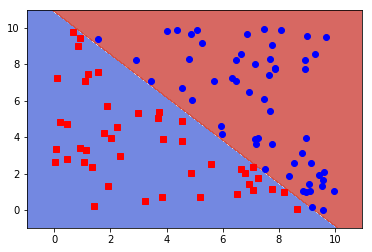

In [223]:
plt.figure()
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
Z = np.c_[xx.ravel(), yy.ravel(), np.ones(len(xx.ravel()))]


Z = 1/(1+np.exp(-(np.matmul(Z, weights))))
Z[Z >= 0.5] = 1
Z[Z < 0.5] = 0

Z = Z.reshape(xx.shape)
#Z = np.sqrt(xx**2 + yy**2)
cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
passed = np.where((hyp > 0.5).flatten())[0]
not_passed = np.where(np.logical_not(np.isin(np.arange(len(X)), passed)))[0]

plt.plot(X[passed, 0], X[passed, 1], 'bo')
plt.plot(X[not_passed, 0], X[not_passed, 1], 'rs')#plt.colorbar(cp)

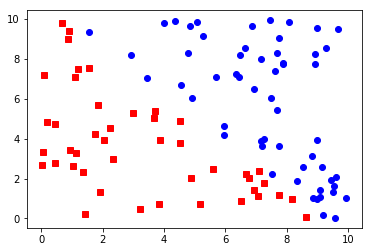

In [212]:
hyp = 1/(1+np.exp(-(np.matmul(X, weights))))
#np.where(hyp > 0.5)
passed = np.where((hyp > 0.5).flatten())[0]
not_passed = np.where(np.logical_not(np.isin(np.arange(len(X)), passed)))[0]

plt.plot(X[passed, 0], X[passed, 1], 'bo')
plt.plot(X[not_passed, 0], X[not_passed, 1], 'rs')